In [105]:
from utils import *

from random_cycles import gen_random_cycles
from local_search import local_search_steepest


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Utils

### Hybrid Evolutionary Algorithm

In [106]:
def gen_initial_population(data, size):
    population = []
    for _ in range(size):
        population.append(gen_random_cycles(get_nodes(data)))
    return population

In [107]:
def recombine(parent1, parent2): # crossing over
    cycle1 = np.concatenate((parent1[0][:len(parent1[0])//2], parent2[0][len(parent2[0])//2:]))
    cycle2 = np.concatenate((parent1[1][:len(parent1[1])//2], parent2[1][len(parent2[1])//2:]))
    return cycle1, cycle2

In [108]:
def hybrid_evolutionary_algorithm(distance_matrix, data, population_size, num_generations):
    population = gen_initial_population(data, population_size)
    
    for _ in range(num_generations):
        
        parent_indices = np.random.choice(len(population), 2, replace=False)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
                
        offspring = recombine(parent1, parent2)
        offspring = local_search_steepest(*offspring, distance_matrix, data)
        
        worst_index = np.argmax([calculate_cycles_length(*ind, distance_matrix) for ind in population])
        worst_length = calculate_cycles_length(*population[worst_index], distance_matrix)

        offspring_length = calculate_cycles_length(*offspring, distance_matrix)
        
        if offspring_length < worst_length: # and is_diverse(offspring, population):
            population[worst_index] = offspring
    
    best_index = np.argmin([calculate_cycles_length(*ind, distance_matrix) for ind in population])
    return population[best_index]



def is_diverse(individual, population, threshold=0.1):
    individual_length = calculate_cycles_length(*individual, distance_matrix)
    for other in population:
        other_length = calculate_cycles_length(*other, distance_matrix)
        if abs(individual_length - other_length) < threshold * individual_length:
            return False
    return True

### Run

In [109]:
FILENAME = 'data/kroB200.tsp'
VISUALIZE = False
num_of_runs = 30

In [110]:
data = read_data_file(FILENAME)
distance_matrix = calculate_distance_matrix(data)

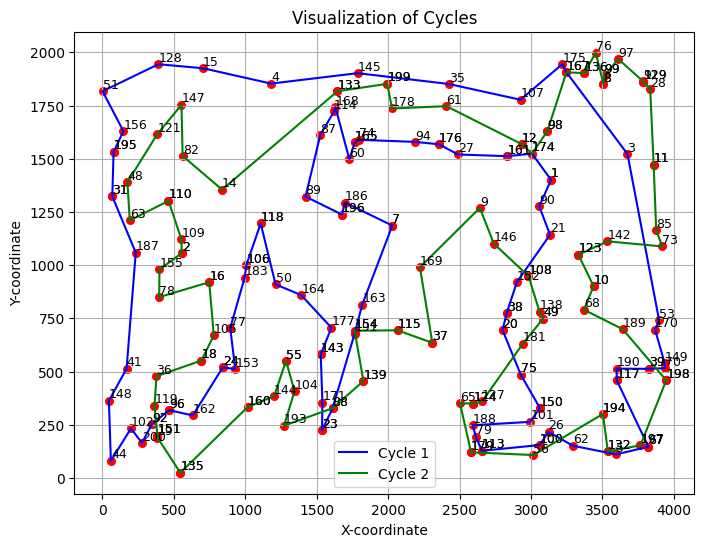

34660.08825124179


In [111]:
best_cycle_1, best_cycle_2 = hybrid_evolutionary_algorithm(
    distance_matrix,
    data,
    population_size=100,
    num_generations=10
    )
plot_cycles(best_cycle_1, best_cycle_2, data)
print(calculate_cycles_length(best_cycle_1, best_cycle_2, distance_matrix))